### The silhouette score is a metric used to evaluate the quality of clustering in data analysis. It measures how well data points are grouped within their assigned clusters compared to data points in other clusters. The score ranges from -1 to 1, with higher values indicating better clustering results

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for model
from sklearn.cluster import KMeans

In [2]:
# we will make use of the kmeans and iris dataset
# load the dataset
d_set=pd.read_csv('iris.csv')
d_set.drop(columns=['species'], axis=1, inplace=True)
d_set.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


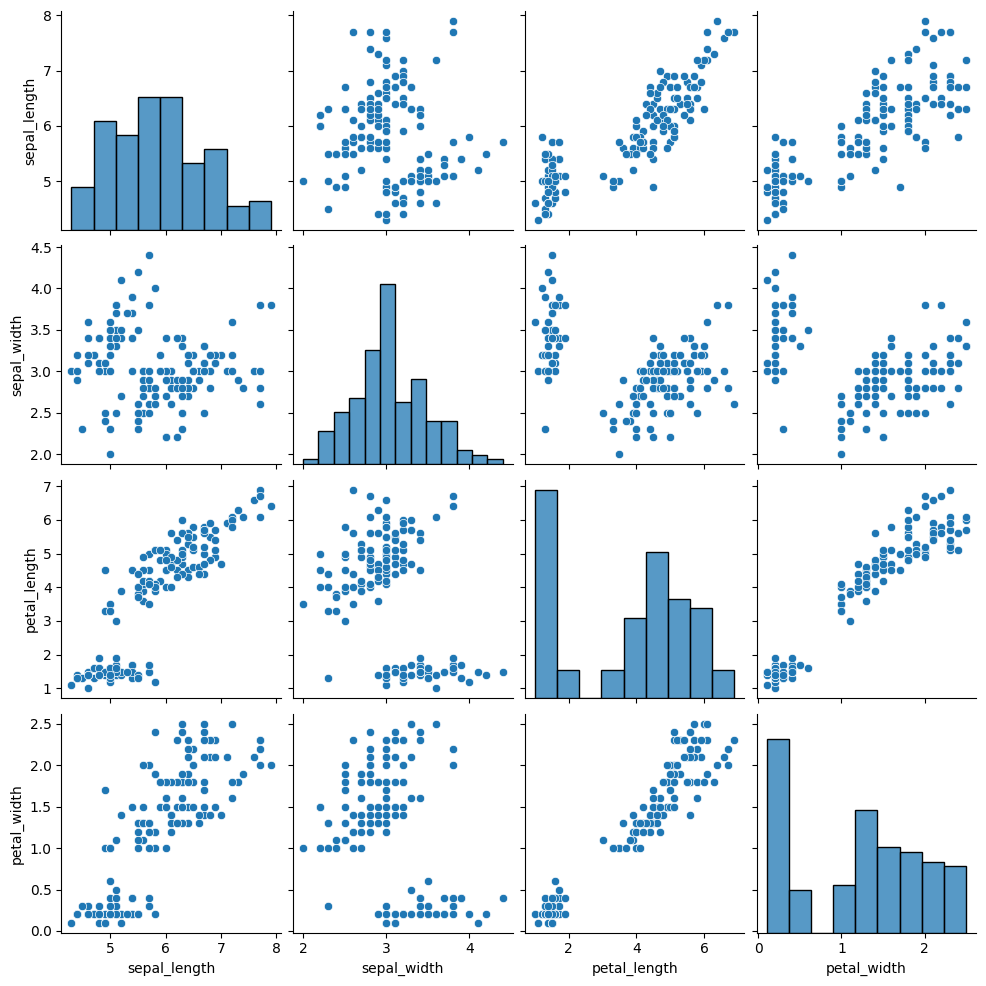

In [4]:
# now pairplot
sns.pairplot(data=d_set)
plt.show()

### result: as it can be seen that the data is almost linearly separable therefore we can apply kmeans algo

In [8]:
# to check the number of clusters to be used
wcss=[]

# loop till 20 values
for i in range(2, 21):
    km=KMeans(n_clusters=i, init='k-means++')

    # fit the data
    km.fit(d_set)

    # wcss values through inertia_
    wcss.append(km.inertia_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

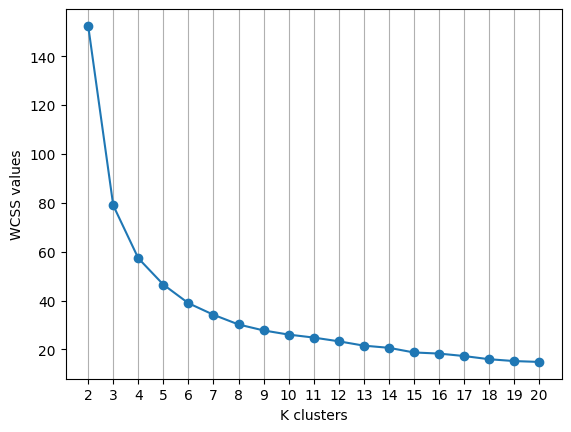

In [9]:
# ploting the graph between wcss and number of clusters
plt.plot([i for i in range(2,21)], wcss, marker='o') # graph between the number of clusters from 2 to 21 and the wcss values
plt.xlabel("K clusters")
plt.ylabel("WCSS values")
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()

### result: from the graph 3 numbers of clusters should be used.

### but we need to find the best number of clusters in the following manner

In [14]:
# to check number of clusters we need to have silhoutte score values
from sklearn.metrics import silhouette_score

# loop to find the best silhoutte score
ss=[]

# number of clusters
n_clusters=[j for j in range(2,21)]

# loop from 2 to 21
for i in range(2,21):
    # model
    km1=KMeans(n_clusters=i)

    # fit the data
    km1.fit(d_set)

    # append the silhoutte values to the above list
    ss.append(silhouette_score(d_set, km1.labels_))

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

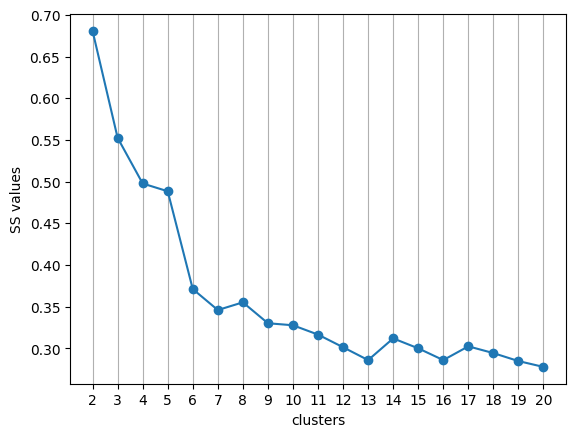

In [15]:
# plot the ss score and clusters
plt.plot(n_clusters, ss, marker='o') # graph between the number of clusters from 2 to 21 and the wcss values
plt.xlabel("clusters")
plt.ylabel("SS values")
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()

### result: above graph shows the highest silhouette value at the cluster number 2 therefore there must be 2 clusters used for the training purpose

In [17]:
# training model using two clusters
km3=KMeans(n_clusters=2)

# fit the data

d_set['predicted']=km3.fit_predict(d_set)

d_set.head()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal_length,sepal_width,petal_length,petal_width,predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


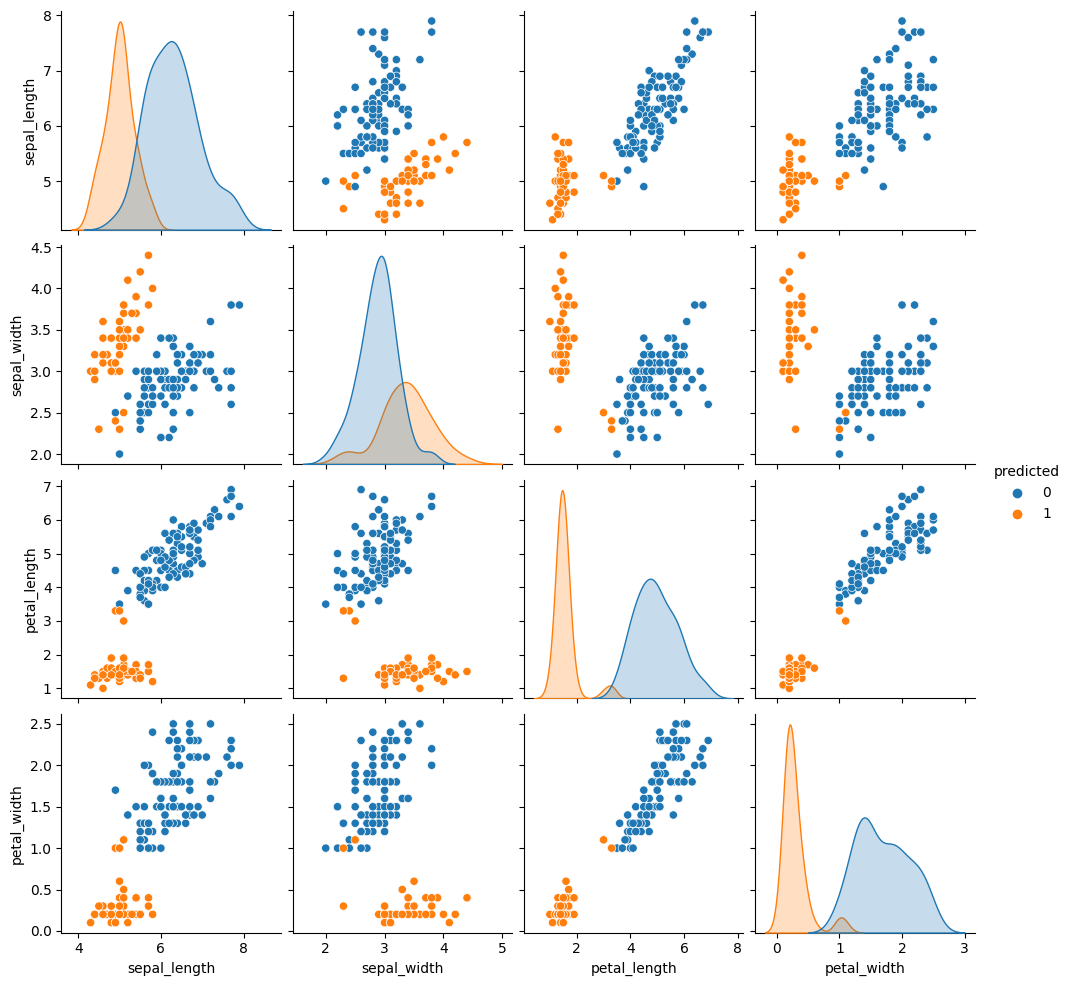

In [19]:
# now graph
sns.pairplot(data=d_set, hue='predicted')
plt.show()